# Cost of living in Austin, TX and the U.S.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.DataFrame(pd.read_csv('../output/us_costs_of_living.csv')).drop(columns=['Unnamed: 0'])
df

,name,us_state,cost_of_living_index,cost_of_living_plus_rent_index,groceries_index,local_purchasing_power_index,rent_index,restaurant_price_index,last_updated_timestamp,cost_of_living_details
0,Akron,OH,61.51,43.19,62.82,95.09,21.92,51.34,2021-07-23 06:04:03.894450+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."
1,Albany,NY,71.27,54.47,68.54,100.38,34.96,78.90,2021-07-23 06:03:12.784457+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."
2,Albuquerque,NM,61.47,46.77,63.74,101.92,29.71,59.80,2021-07-23 06:04:03.870895+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."
3,Anchorage,AK,91.62,66.90,97.01,100.29,38.21,77.74,2021-07-23 06:01:51.163839+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."
4,Ann Arbor,MI,72.24,61.74,74.28,135.21,49.54,66.69,2021-07-23 06:03:04.324288+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."
...,...,...,...,...,...,...,...,...,...,...
90,Tucson,AZ,64.63,47.81,60.96,70.92,28.28,66.30,2021-07-23 06:03:52.881112+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."
91,Tulsa,OK,60.84,46.73,59.89,120.28,30.35,55.47,2021-07-23 06:04:04.509476+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."
92,Vancouver,WA,67.80,57.29,63.58,102.83,45.08,68.41,2021-07-23 06:03:34.546316+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."
93,Washington,DC,83.74,81.01,83.81,97.43,77.83,79.50,2021-07-23 06:02:00.327068+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."


In [55]:
austin_col = df.loc[df.name == 'Austin'].cost_of_living_plus_rent_index.values[0]
austin_col

59.85

In [26]:
mean_col = df.cost_of_living_plus_rent_index.mean()
mean_col

61.0864210526316

In [27]:
median_col = df.cost_of_living_plus_rent_index.median()
median_col

58.17

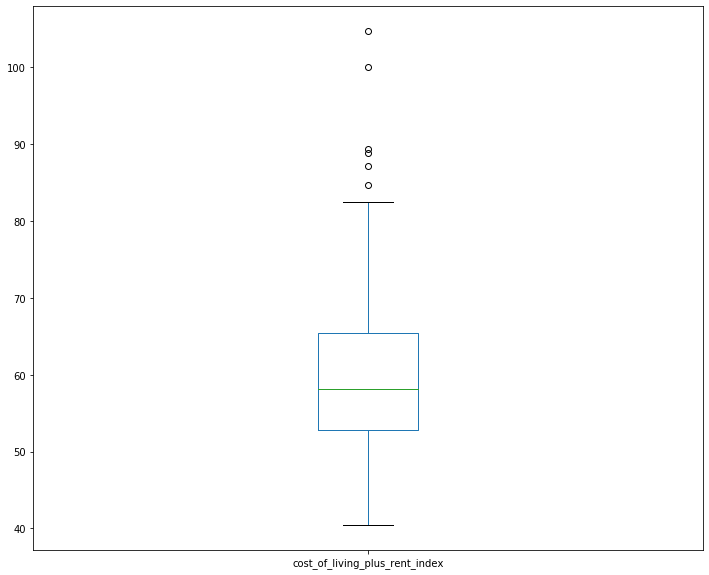

In [16]:
df.cost_of_living_plus_rent_index.plot.box(figsize=(12,10))

In [19]:
city_df = sorted_df.set_index('name')
city_df['cost_of_living_plus_rent_index'].head()

name
San Francisco    104.72
New York         100.00
Oakland           89.32
Brooklyn          88.87
Santa Barbara     87.09
Name: cost_of_living_plus_rent_index, dtype: float64

Text(40, 69.85, 'Austin cost of living: 59.85')

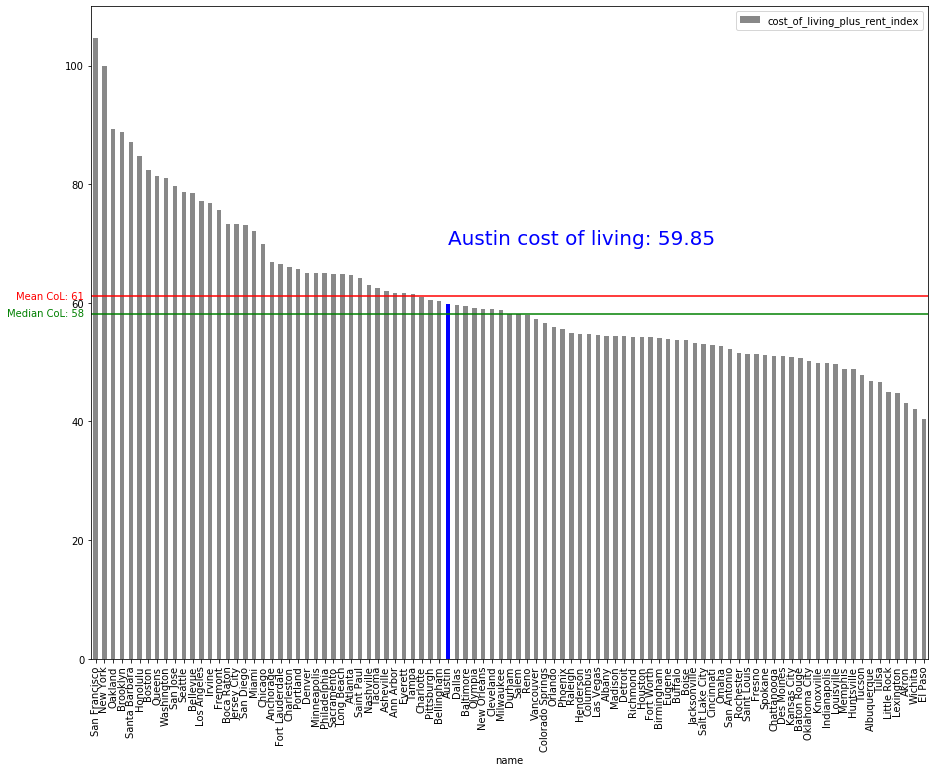

In [57]:
ax = city_df['cost_of_living_plus_rent_index'].plot(kind='bar', 
                                                    figsize=(15,12), 
                                                    legend=False)

for bar in ax.patches:
    bar.set_facecolor('#888888')

highlight = 'Austin'
pos = city_df.index.get_loc(highlight)

ax.patches[pos].set_facecolor('blue')
ax.legend()

plt.axhline(median_col, color='green')
plt.axhline(mean_col, color='red')

trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), 
                                             ax.transData)

ax.text(0, median_col, 'Median CoL: {:.0f}'.format(median_col), 
        color='green', transform=trans, 
        ha='right', va='center')
ax.text(0, mean_col, 'Mean CoL: {:.0f}'.format(mean_col), 
        color='red', transform=trans, 
        ha='right', va='center')

ax.annotate(f'Austin cost of living: {austin_col}', 
            xy=(pos, austin_col+10), color='b', fontsize=20)

In [65]:
for x in df.cost_of_living_details:
    print(x)

[{'currency': 'USD', 'details': [{'Item': 'Estimated Monthly Costs Without Rent', 'Range': 'N/A', 'Value': '821.21'}, {'Item': 'Meal, Inexpensive Restaurant', 'Range': '4.0-20.02', 'Value': '10.01'}, {'Item': 'Meal for 2 People, Mid-range Restaurant, Three-course', 'Range': '34.02-85.05', 'Value': '44.03'}, {'Item': 'McMeal at McDonalds (or Equivalent Combo Meal)', 'Range': '6.01-11.01', 'Value': '7.75'}, {'Item': 'Domestic Beer (1 pint draught)', 'Range': '2.0-11.01', 'Value': '3.0'}, {'Item': 'Imported Beer (12 oz small bottle)', 'Range': '3.0-11.01', 'Value': '4.0'}, {'Item': 'Cappuccino (regular)', 'Range': '1.99-11.01', 'Value': '3.4'}, {'Item': 'Coke/Pepsi (12 oz small bottle)', 'Range': '1.0-2.0', 'Value': '1.54'}, {'Item': 'Water (12 oz small bottle)', 'Range': '1.0-1.59', 'Value': '1.14'}, {'Item': 'Milk (regular), (1 gallon)', 'Range': '1.88-3.5', 'Value': '2.53'}, {'Item': 'Loaf of Fresh White Bread (1 lb)', 'Range': '1.0-2.8', 'Value': '1.71'}, {'Item': 'Rice (white), (1 lb